<a href="https://colab.research.google.com/github/pedro772/deep_learning_2020.6/blob/main/filters_and_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

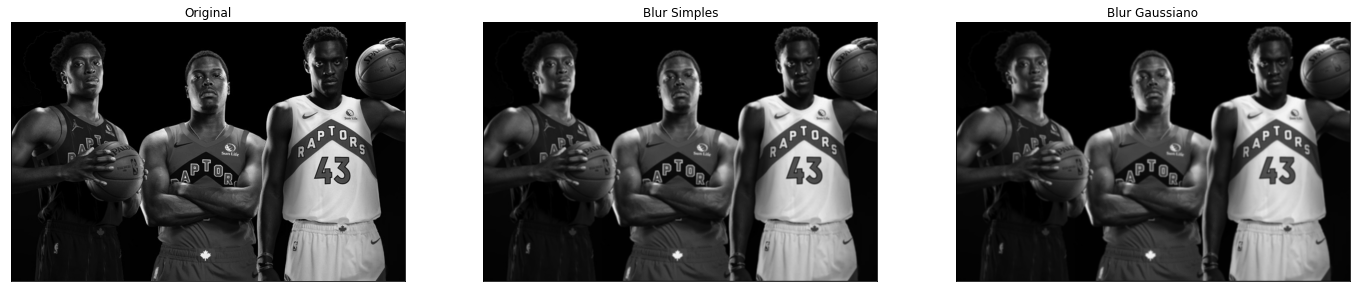

In [62]:
from scipy.signal import convolve2d
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lê a imagem
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/ML DL Class/Image Processing/raps.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Kernels
# Blur Simples
kb = (np.array([[1,1,1],[1,1,1],[1,1,1]]))/9 
# Blur Gaussiano
kg = (np.array([[0,0,0,5,0,0,0],
                [0,5,18,32,18,5,0],
                [0,18,64,100,64,18,0],
                [5,32,100,100,100,32,5],
                [0,18,64,100,64,18,0],
                [0,5,18,32,18,5,0],
                [0,0,0,5,0,0,0]]))

# 
blur = convolve2d(gray,kb,mode='same')

# Convolução para Blur Gaussiano
gaussian = convolve2d(gray,kg,mode='same')

fig = plt.figure(figsize=(24,12))
fig.add_subplot(1,3,1),plt.imshow(gray, 'gray')
plt.title('Original'),plt.xticks([]), plt.yticks([])
fig.add_subplot(1,3,2),plt.imshow(blur, 'gray')
plt.title('Blur Simples'),plt.xticks([]), plt.yticks([])
fig.add_subplot(1,3,3),plt.imshow(gaussian,'gray')
plt.title('Blur Gaussiano'),plt.xticks([]), plt.yticks([])

plt.show()

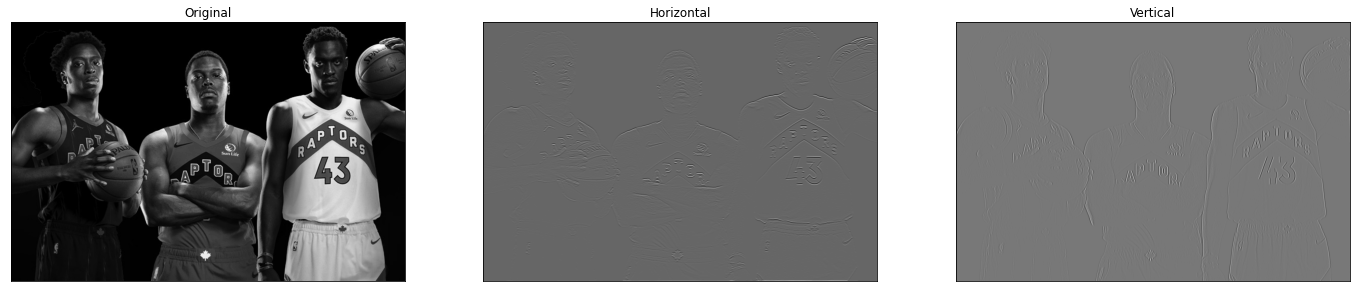

In [63]:
# Kernels
# Detecção de linhas horizontais
kh = (np.array([[-1,-1,-1], [2,2,2], [-1,-1,-1]]))
# Detecção de linhas verticais
kv = (np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]]))

# Convolução para linhas horizontais
horizontal = convolve2d(gray,kh,mode='same')
# Convolução para linhas verticais
vertical = convolve2d(gray,kv,mode='same')

fig = plt.figure(figsize=(24,12))
fig.add_subplot(1,3,1),plt.imshow(gray, 'gray')
plt.title('Original'),plt.xticks([]), plt.yticks([])
fig.add_subplot(1,3,2),plt.imshow(horizontal, 'gray')
plt.title('Horizontal'),plt.xticks([]), plt.yticks([])
fig.add_subplot(1,3,3),plt.imshow(vertical,'gray')
plt.title('Vertical'),plt.xticks([]), plt.yticks([])

plt.show()

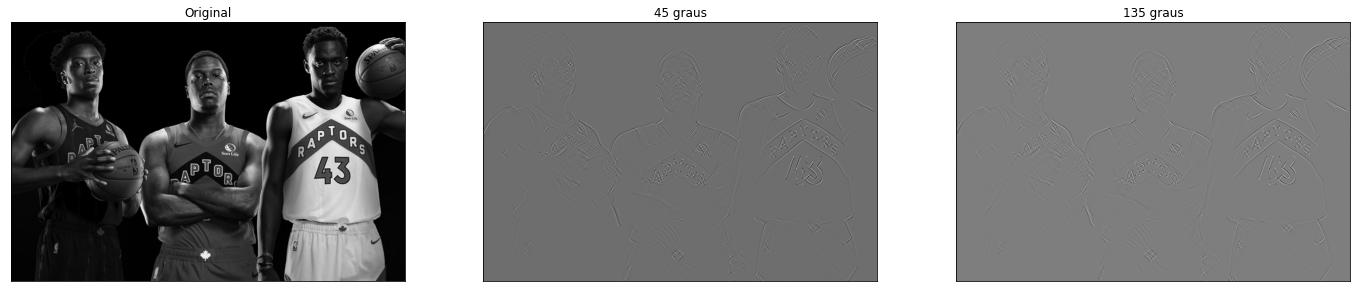

In [64]:
# Kernels
# Detecção linhas de 45 graus
k45 = (np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]]))
# Detecção de linhas de 135 graus
k135 = (np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]]))#135degrees

# Convolução para linhas de 45 graus
deg45 = convolve2d(gray,k45,mode='same')
# Convolução para linhas de 135 graus
deg135 = convolve2d(gray,k135,mode='same')

fig = plt.figure(figsize=(24,12))
fig.add_subplot(1,3,1),plt.imshow(gray, 'gray')
plt.title('Original'),plt.xticks([]), plt.yticks([])
fig.add_subplot(1,3,2),plt.imshow(deg45, 'gray')
plt.title('45 graus'),plt.xticks([]), plt.yticks([])
fig.add_subplot(1,3,3),plt.imshow(deg135,'gray')
plt.title('135 graus'),plt.xticks([]), plt.yticks([])

plt.show()

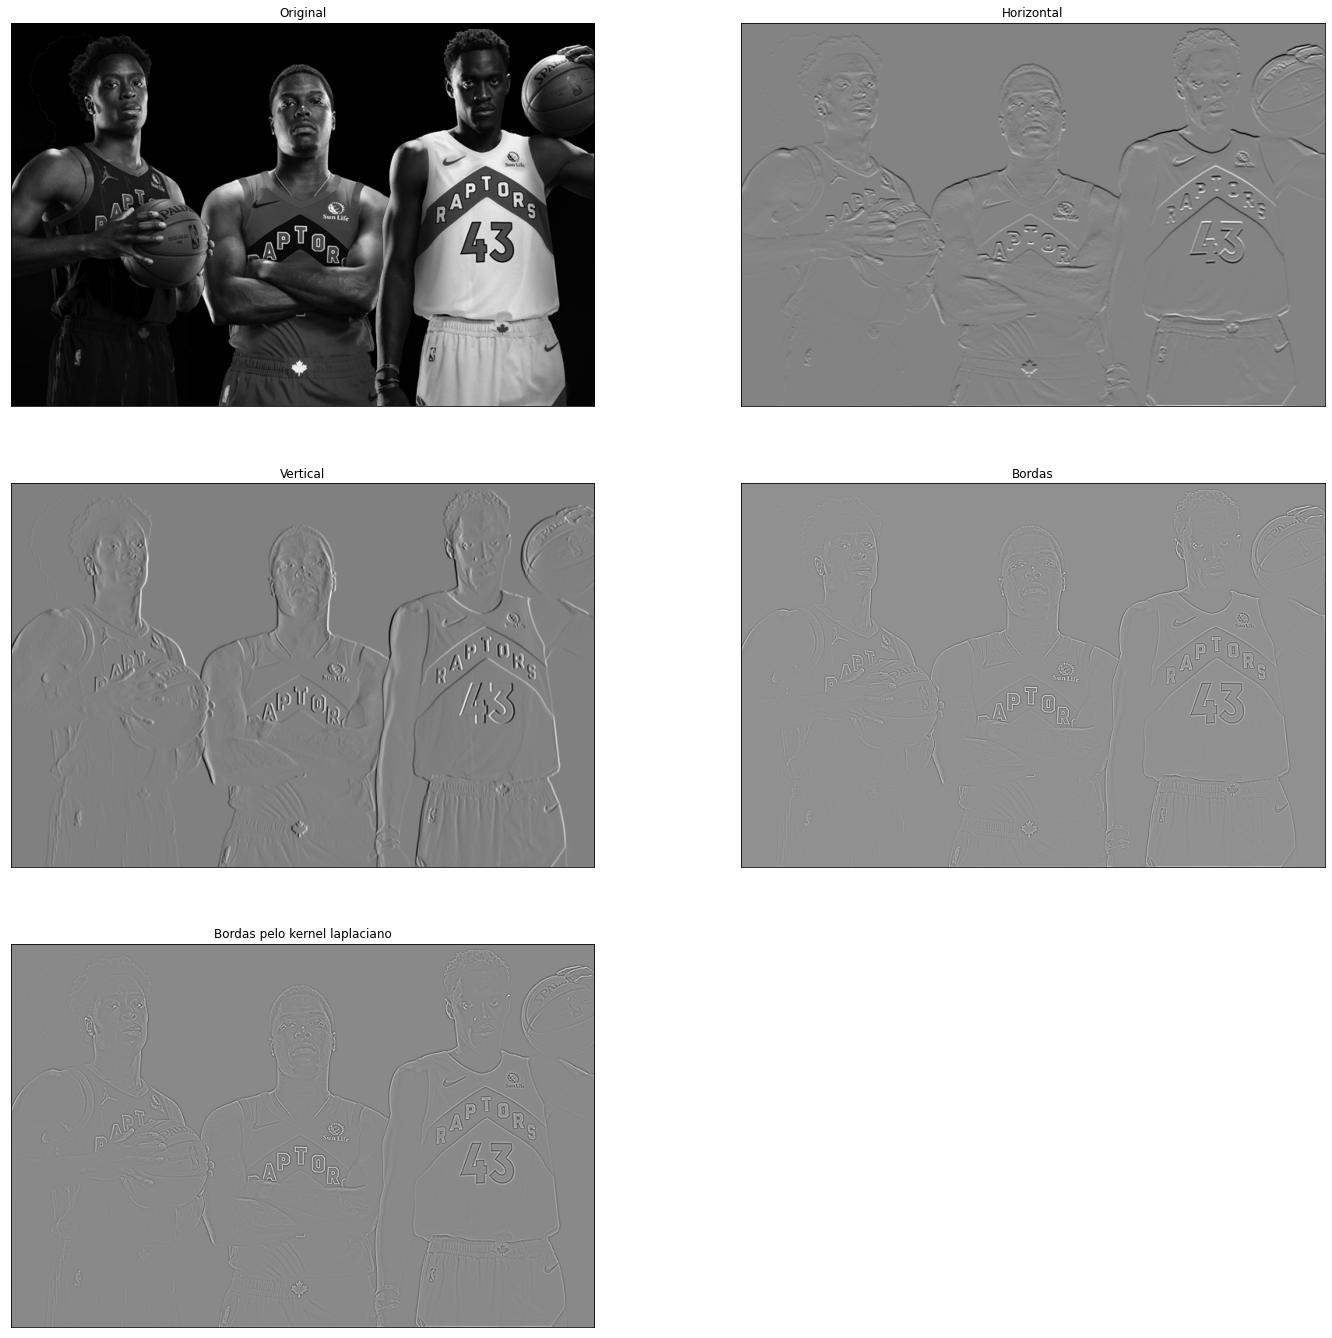

In [68]:
# Kernels
# Detecção de bordas
ked = (np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]))
# Detecção de linhas horizontais via técnica de Sobel
kho = (np.array([[-1,-2,-1],[0,0,0],[1,2,1]]))
# Detecção de linhas verticais via técnica de Sobel
kve = (np.array([[-1,0,1],[-2,0,2],[-1,0,1]]))
# Detecção de bordas laplaciano
klap = (np.array([[0,0,-1,0,0],
                 [0,-1,-2,-1,0],
                 [-1,-2,16,-2,-1],
                 [0,-1,-2,-1,0],
                 [0,0,-1,0,0]]))

# Convolução para detecção de bordas
edge = convolve2d(gray,ked,mode='same')
# Convolução para linhas horizontais
hor = convolve2d(gray,kho,mode='same')
# Convolução para linhas verticais
ver = convolve2d(gray,kve,mode='same')
# Convolução para detecção de bordas pelo kernel laplaciano
lap = convolve2d(gray,klap,mode='same')

fig = plt.figure(figsize=(24,24))
fig.add_subplot(3,2,1),plt.imshow(gray, 'gray')
plt.title('Original'),plt.xticks([]), plt.yticks([])
fig.add_subplot(3,2,2),plt.imshow(hor, 'gray')
plt.title('Horizontal'),plt.xticks([]), plt.yticks([])
fig.add_subplot(3,2,3),plt.imshow(ver,'gray')
plt.title('Vertical'),plt.xticks([]), plt.yticks([])
fig.add_subplot(3,2,4),plt.imshow(edge, 'gray')
plt.title('Bordas'),plt.xticks([]), plt.yticks([])
fig.add_subplot(3,2,5),plt.imshow(lap,'gray')
plt.title('Bordas pelo kernel laplaciano'),plt.xticks([]), plt.yticks([])

plt.show()

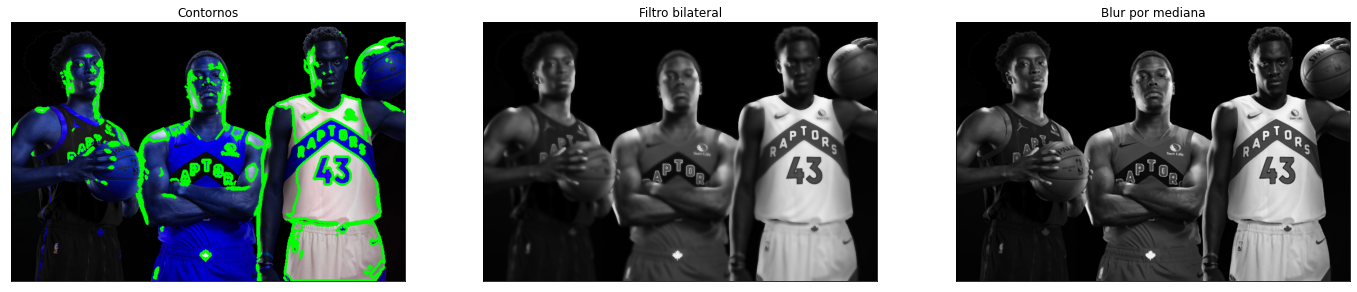

In [70]:
# Método do OpenCV para detectar contornos
# A função necessita de um objeto branco e fundo preto, por isso os contornos são observados apenas nas partes brancas da imagem
ret, thresh = cv2.threshold(gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont = cv2.drawContours(img, contours, -1, (0,255,0), 3)

# Filtro bilateral para remoção de ruído preservando os contornos
bilateral = cv2.bilateralFilter(gray, 9, 75, 75)

# Blur pelos valores medianos usando Kernel 3x3
median = cv2.medianBlur(gray,3)

fig = plt.figure(figsize=(24,12))
fig.add_subplot(1,3,1),plt.imshow(cont, 'gray')
plt.title('Contornos'),plt.xticks([]), plt.yticks([])
fig.add_subplot(1,3,2),plt.imshow(bilateral, 'gray')
plt.title('Filtro bilateral'),plt.xticks([]), plt.yticks([])
fig.add_subplot(1,3,3),plt.imshow(median, 'gray')
plt.title('Blur por mediana'),plt.xticks([]), plt.yticks([])

plt.show()

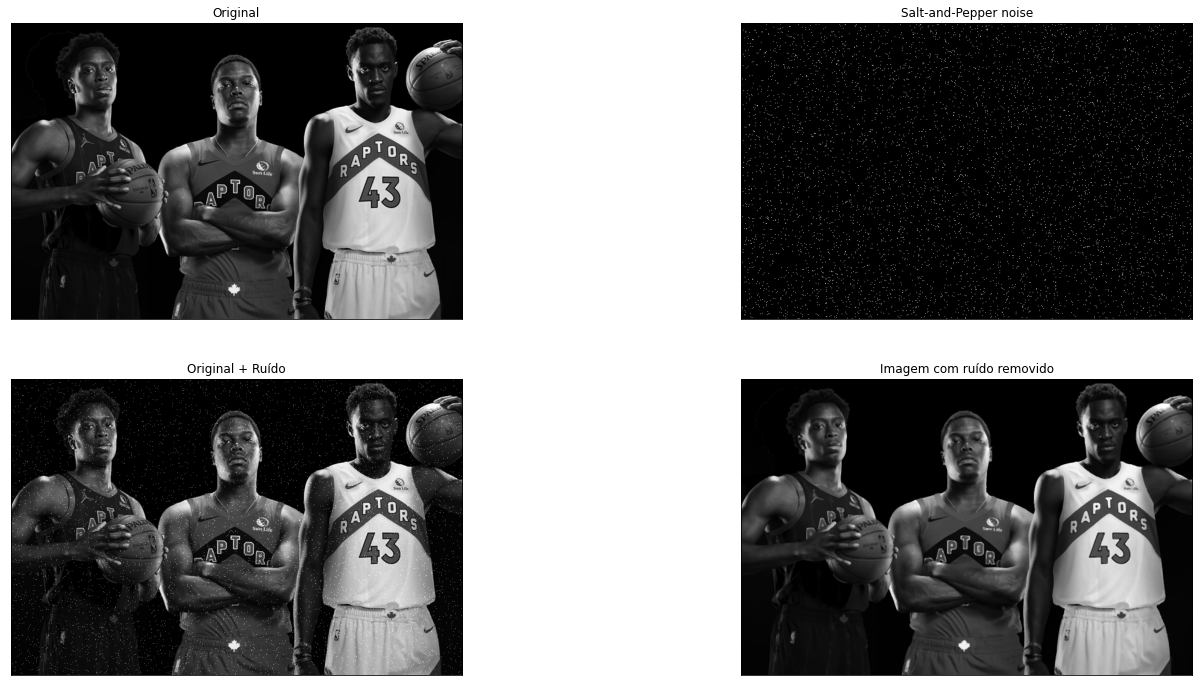

In [69]:
# Método para criar o Salt-and-Pepper noise, também conhecido como Impulse Noise
impulse_noise = np.zeros((gray.shape[0], gray.shape[1]),dtype=np.uint8)
ret,impulse_noise = cv2.threshold(uniform_noise,250,255,cv2.THRESH_BINARY)
impulse_noise = (impulse_noise*0.5).astype(np.uint8)
noisy_image3 = cv2.add(gray,impulse_noise)

# Blur pelos valores medianos usando Kernel 3x3 para retirar o ruído da imagem
med = cv2.medianBlur(noisy_image3,3)

fig = plt.figure(figsize=(24,12))
fig.add_subplot(2,2,1),plt.imshow(gray, 'gray')
plt.title('Original'),plt.xticks([]), plt.yticks([])
fig.add_subplot(2,2,2),plt.imshow(impulse_noise, 'gray')
plt.title('Salt-and-Pepper noise'),plt.xticks([]), plt.yticks([])
fig.add_subplot(2,2,3),plt.imshow(noisy_image3, 'gray')
plt.title('Original + Ruído'),plt.xticks([]), plt.yticks([])
fig.add_subplot(2,2,4),plt.imshow(med, 'gray')
plt.title('Imagem com ruído removido'),plt.xticks([]), plt.yticks([])

plt.show()